<a href="https://colab.research.google.com/github/Shamiul-693/Predicting-Cryptocurrency-Prices/blob/main/Predicting_Cryptocurrency_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Predicting Cryptocurrency Prices/Bitcoin.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,1151.000000,1151.000000,1151.000000,1151.000000,1.151000e+03
mean,26488.652992,27528.416710,25416.606967,26496.733082,2.874051e+07
std,17963.101635,18432.925246,17484.604545,17952.113609,5.202999e+07
min,4943.832520,5338.512695,0.076853,4936.755371,0.000000e+00
25%,9706.758301,10090.012695,9360.636230,9712.636719,7.495500e+03
50%,20873.337891,21867.822266,20245.201172,20902.404297,1.864334e+06
75%,41782.333984,42749.439453,40890.394531,41782.333984,4.076471e+07
max,67470.437500,85563.984375,66072.343750,67502.421875,5.791706e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1151 non-null   object 
 1   Open      1151 non-null   float64
 2   High      1151 non-null   float64
 3   Low       1151 non-null   float64
 4   Close     1151 non-null   float64
 5   Volume    1151 non-null   float64
 6   Currency  1151 non-null   object 
dtypes: float64(5), object(2)
memory usage: 63.1+ KB


In [6]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')


In [7]:
print(df.isnull().sum())   # Count missing values per column


Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64


## Summary statistics

In [10]:

print(df[['Open', 'High', 'Low', 'Close', 'Volume']].describe())


               Open          High           Low         Close        Volume
count   1151.000000   1151.000000   1151.000000   1151.000000  1.151000e+03
mean   26488.652992  27528.416710  25416.606967  26496.733082  2.874051e+07
std    17963.101635  18432.925246  17484.604545  17952.113609  5.202999e+07
min     4943.832520   5338.512695      0.076853   4936.755371  0.000000e+00
25%     9706.758301  10090.012695   9360.636230   9712.636719  7.495500e+03
50%    20873.337891  21867.822266  20245.201172  20902.404297  1.864334e+06
75%    41782.333984  42749.439453  40890.394531  41782.333984  4.076471e+07
max    67470.437500  85563.984375  66072.343750  67502.421875  5.791706e+08


# Correlation matrix

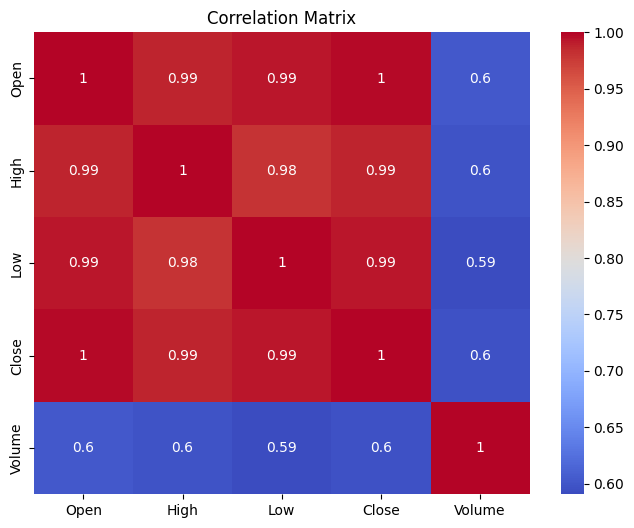

In [11]:
# Correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Visualize correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Consider creating additional time-series features to improve the model

In [12]:
# Moving averages
df['7_day_MA'] = df['Close'].rolling(window=7).mean()
df['14_day_MA'] = df['Close'].rolling(window=14).mean()

# Daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Volatility
df['Volatility'] = df['High'] - df['Low']

print(df.head())


         Date          Open          High           Low         Close  \
0  2019-06-18   9128.269531   9149.763672   8988.606445   9062.045898   
1  2019-06-19   9068.174805   9277.677734   9051.094727   9271.459961   
2  2019-06-20   9271.567383   9573.689453   9209.416992   9519.200195   
3  2019-06-21   9526.833984  10130.935547   9526.833984  10127.998047   
4  2019-06-22  10151.890625  11171.013672  10083.189453  10719.981445   

     Volume Currency  7_day_MA  14_day_MA  Daily_Return   Volatility  
0  952850.0      USD       NaN        NaN           NaN   161.157227  
1  131077.0      USD       NaN        NaN      0.023109   226.583008  
2   83052.0      USD       NaN        NaN      0.026721   364.272461  
3   76227.0      USD       NaN        NaN      0.063955   604.101562  
4   84485.0      USD       NaN        NaN      0.058450  1087.824219  


#Visualize the price data over time series to identify trends, seasonality, and potential outliers.

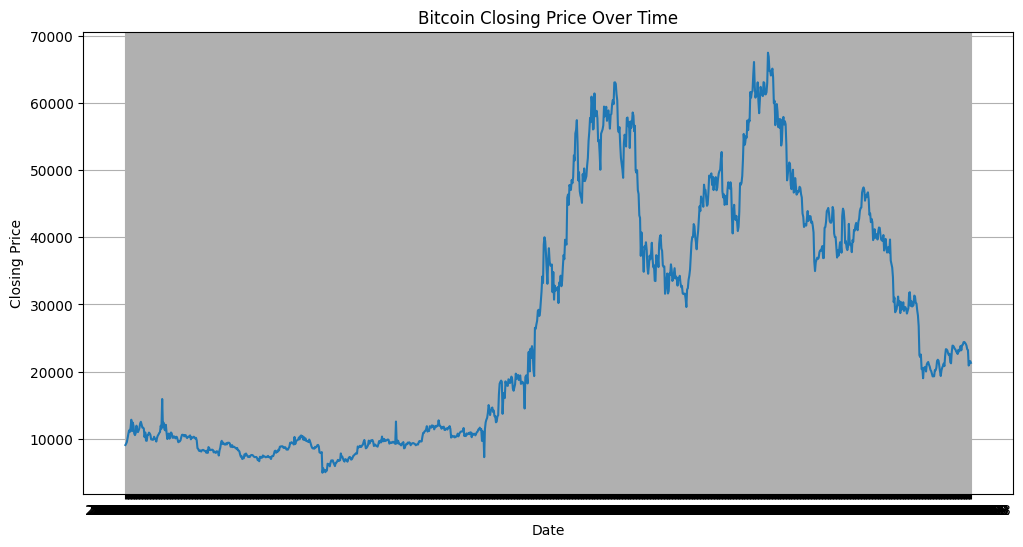

In [21]:


# Visualize closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Bitcoin Closing Price Over Time')
plt.grid(True)
plt.show()


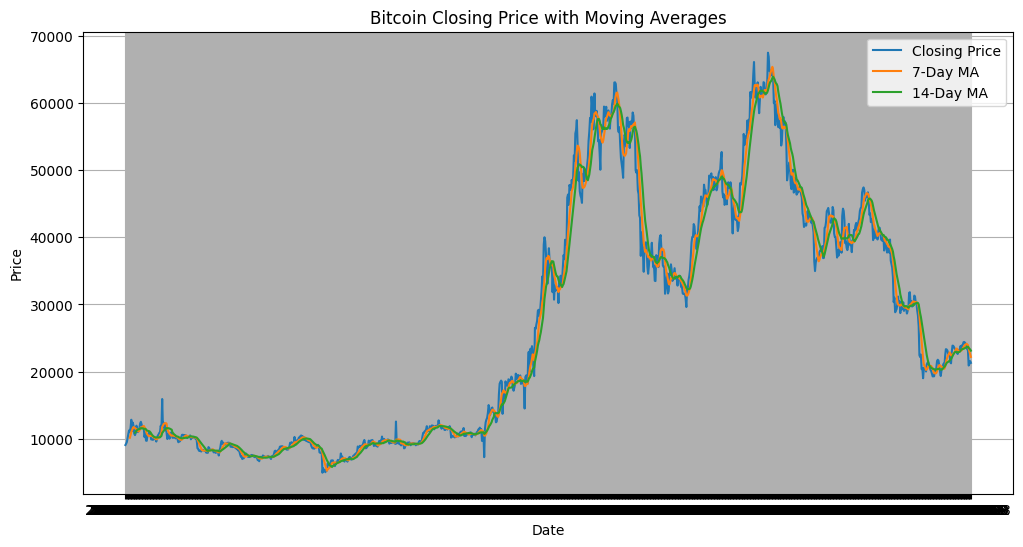

In [18]:
# Visualize moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['7_day_MA'], label='7-Day MA')
plt.plot(df['Date'], df['14_day_MA'], label='14-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Closing Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

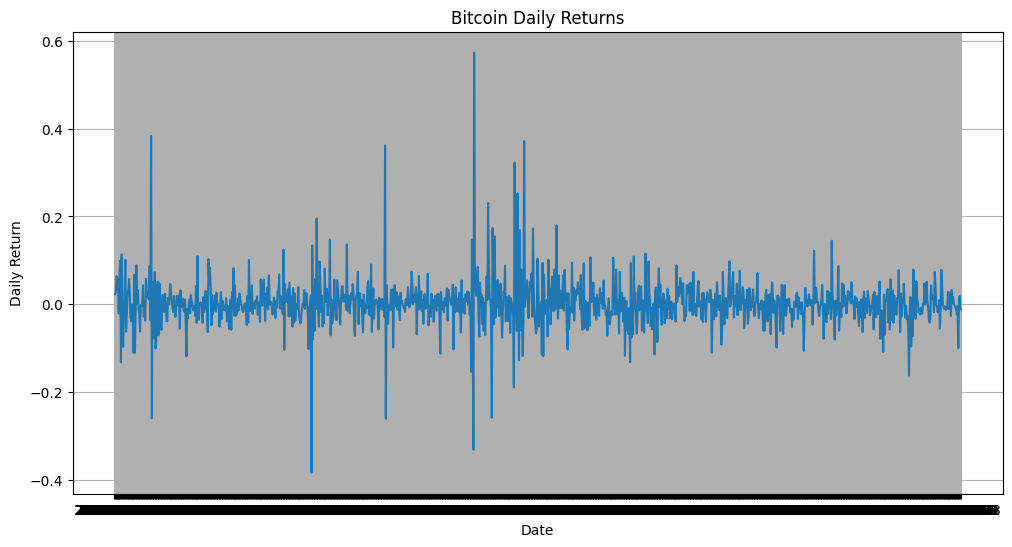

In [19]:
# Visualize daily returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Return'])
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Bitcoin Daily Returns')
plt.grid(True)
plt.show()

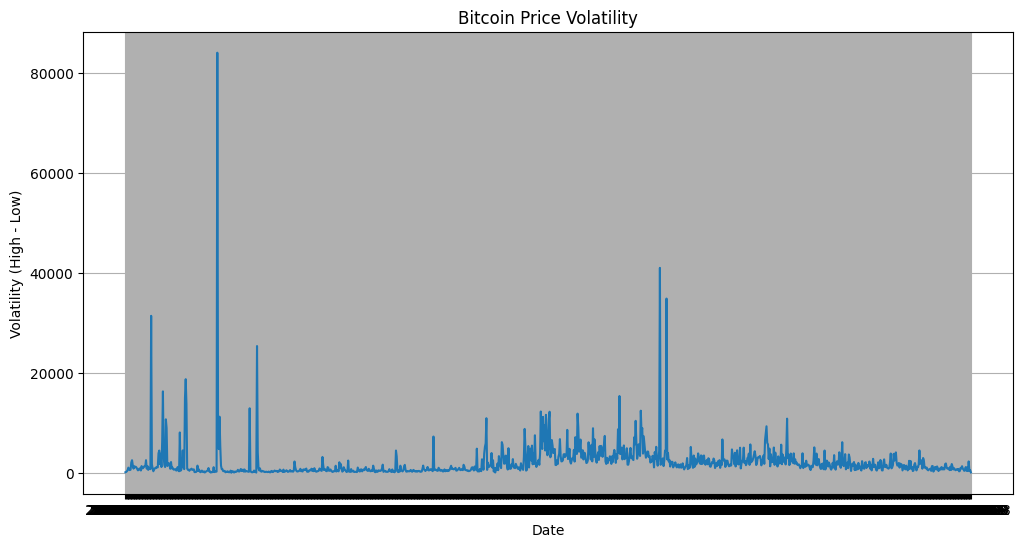

In [20]:
# Visualize volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility (High - Low)')
plt.title('Bitcoin Price Volatility')
plt.grid(True)
plt.show()

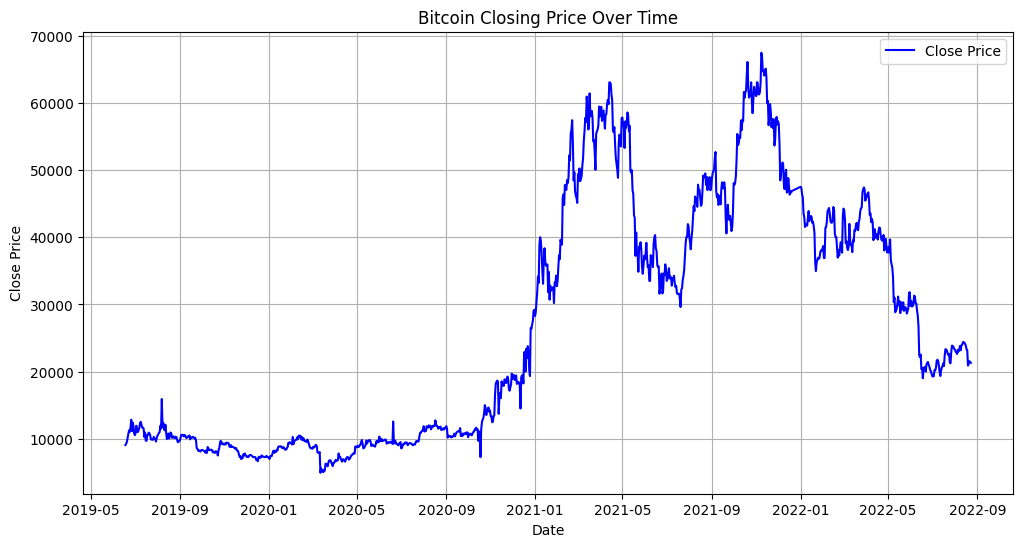

In [24]:
import matplotlib.pyplot as plt

# Plot the Close price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


#trends

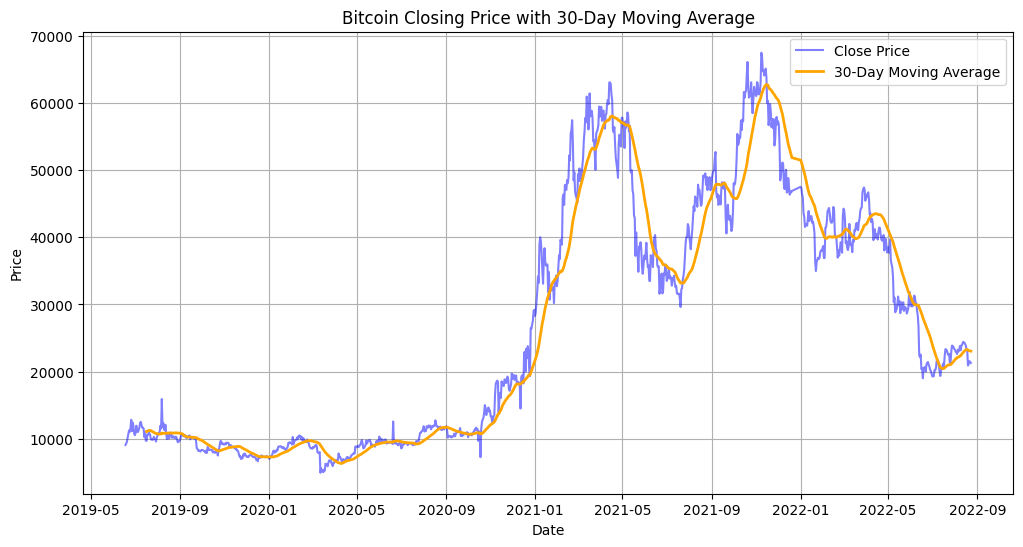

In [25]:
# Calculate a 30-day moving average
df['30_day_MA'] = df['Close'].rolling(window=30).mean()

# Plot Close price with the moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df.index, df['30_day_MA'], label='30-Day Moving Average', color='orange', linewidth=2)
plt.title('Bitcoin Closing Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Identify Seasonality

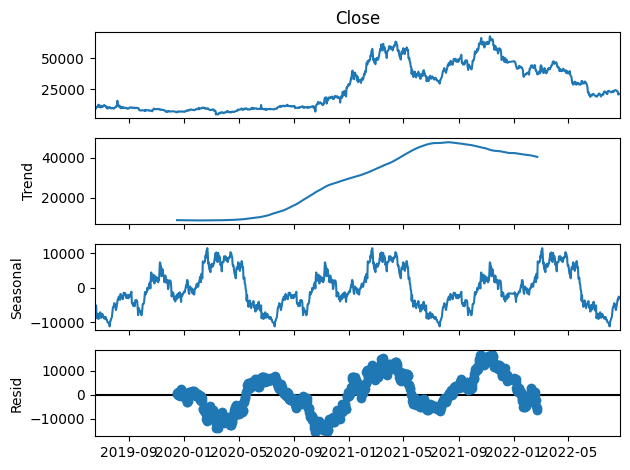

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Close'], model='additive', period=365)

# Plot the decomposition
result.plot()
plt.show()


#Calculate descriptive statistics for numerical features (mean, median, standard deviation) and analyze categorical features (frequency distribution).

In [30]:
# Descriptive statistics for numerical features
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Calculate statistics
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
std_values = df[numerical_columns].std()

# Display the results
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation:\n", std_values)

# Summary statistics (includes more details like min, max, etc.)
print("\nSummary Statistics:\n", df[numerical_columns].describe())


Mean Values:
 Open      2.648865e+04
High      2.752842e+04
Low       2.541661e+04
Close     2.649673e+04
Volume    2.874051e+07
dtype: float64

Median Values:
 Open      2.087334e+04
High      2.186782e+04
Low       2.024520e+04
Close     2.090240e+04
Volume    1.864334e+06
dtype: float64

Standard Deviation:
 Open      1.796310e+04
High      1.843293e+04
Low       1.748460e+04
Close     1.795211e+04
Volume    5.202999e+07
dtype: float64

Summary Statistics:
                Open          High           Low         Close        Volume
count   1151.000000   1151.000000   1151.000000   1151.000000  1.151000e+03
mean   26488.652992  27528.416710  25416.606967  26496.733082  2.874051e+07
std    17963.101635  18432.925246  17484.604545  17952.113609  5.202999e+07
min     4943.832520   5338.512695      0.076853   4936.755371  0.000000e+00
25%     9706.758301  10090.012695   9360.636230   9712.636719  7.495500e+03
50%    20873.337891  21867.822266  20245.201172  20902.404297  1.864334e+06
75%

In [35]:
# Frequency distribution for the 'Currency' column
if 'Currency' in df.columns:
    currency_distribution = df['Currency'].value_counts()
    print("\nFrequency Distribution of Currency:\n", currency_distribution)
else:
    print("No categorical columns found.")



Frequency Distribution of Currency:
 Currency
USD    1151
Name: count, dtype: int64


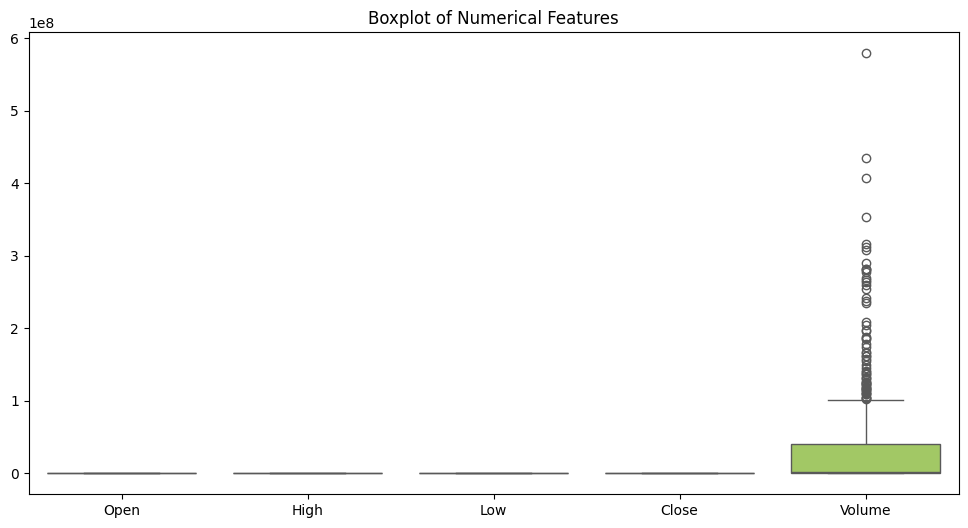

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], palette='Set2')
plt.title('Boxplot of Numerical Features')
plt.show()


#Data Preprocessing (LO2):

#Define the Target Variable

In [44]:
eth_df = pd.read_csv("/content/drive/MyDrive/Predicting Cryptocurrency Prices/ethereum.csv")

In [45]:
eth_df.head()

,date,Open,High,Low,Close,price,Currency
0,3/10/2016,11.20,11.85,11.07,11.75,4,USD
1,3/11/2016,11.75,11.95,11.75,11.95,179,USD
2,3/12/2016,11.95,13.45,11.95,12.92,833,USD
3,3/13/2016,12.92,15.07,12.92,15.07,1295,USD
4,3/14/2016,15.07,15.07,11.40,12.50,92183,USD


In [48]:
eth_df['date'] = pd.to_datetime(eth_df['date'])

In [49]:

print(eth_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2358 non-null   datetime64[ns]
 1   Open      2358 non-null   float64       
 2   High      2358 non-null   float64       
 3   Low       2358 non-null   float64       
 4   Close     2358 non-null   float64       
 5   price     2358 non-null   int64         
 6   Currency  2358 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 129.1+ KB
None


#Merge Bitcoin and Ethereum Datasets

In [50]:
# Ensure both datasets have consistent date formatting
df.reset_index(inplace=True)  # Reset Bitcoin index to keep 'Date' as a column
eth_df.rename(columns={'date': 'Date'}, inplace=True)

# Merge the datasets on 'Date'
merged_df = pd.merge(df, eth_df[['Date', 'Close']], on='Date', how='inner', suffixes=('_Bitcoin', '_Ethereum'))

# Preview the merged dataset
print(merged_df.head())


        Date          Open          High           Low  Close_Bitcoin  \
0 2019-06-18   9128.269531   9149.763672   8988.606445    9062.045898   
1 2019-06-19   9068.174805   9277.677734   9051.094727    9271.459961   
2 2019-06-20   9271.567383   9573.689453   9209.416992    9519.200195   
3 2019-06-21   9526.833984  10130.935547   9526.833984   10127.998047   
4 2019-06-22  10151.890625  11171.013672  10083.189453   10719.981445   

     Volume Currency  7_day_MA  14_day_MA  Daily_Return   Volatility  Year  \
0  952850.0      USD       NaN        NaN           NaN   161.157227  2019   
1  131077.0      USD       NaN        NaN      0.023109   226.583008  2019   
2   83052.0      USD       NaN        NaN      0.026721   364.272461  2019   
3   76227.0      USD       NaN        NaN      0.063955   604.101562  2019   
4   84485.0      USD       NaN        NaN      0.058450  1087.824219  2019   

   30_day_MA  Bitcoin_Target  Close_Ethereum  
0        NaN     9271.459961          264.59 

#Define Target Variables

In [52]:
# Define target variables for the next time window
merged_df['Bitcoin_Target'] = merged_df['Close_Bitcoin'].shift(-1)  # Next day's Bitcoin price
merged_df['Ethereum_Target'] = merged_df['Close_Ethereum'].shift(-1)  # Next day's Ethereum price

# Drop the last row (due to NaN targets caused by shifting)
merged_df.dropna(inplace=True)

# Preview the dataset with target variables
print(merged_df[['Date', 'Close_Bitcoin', 'Bitcoin_Target', 'Close_Ethereum', 'Ethereum_Target']].head())


         Date  Close_Bitcoin  Bitcoin_Target  Close_Ethereum  Ethereum_Target
29 2019-07-17    9685.883789    10548.814453          210.95           225.23
30 2019-07-18   10548.814453    10572.655273          225.23           220.09
31 2019-07-19   10572.655273    10913.607422          220.09           227.86
32 2019-07-20   10913.607422    10792.991211          227.86           225.01
33 2019-07-21   10792.991211    10556.007812          225.01           217.27


# Feature-Target Split

In [55]:
# Rename columns for consistency
merged_df.rename(columns={
    'Open': 'Open_Ethereum',
    'High': 'High_Ethereum',
    'Low': 'Low_Ethereum',
    'price': 'Price_Ethereum'
}, inplace=True)

# Ensure Bitcoin columns are properly named
if 'Open' in merged_df.columns and 'High' in merged_df.columns:
    merged_df.rename(columns={
        'Open': 'Open_Bitcoin',
        'High': 'High_Bitcoin',
        'Low': 'Low_Bitcoin',
    }, inplace=True)

# Verify the updated column names
print("Updated Columns in merged_df:\n", merged_df.columns)


Updated Columns in merged_df:
 Index(['Date', 'Open_Ethereum', 'High_Ethereum', 'Low_Ethereum',
       'Close_Bitcoin', 'Volume', 'Currency', '7_day_MA', '14_day_MA',
       'Daily_Return', 'Volatility', 'Year', '30_day_MA', 'Bitcoin_Target',
       'Close_Ethereum', 'Ethereum_Target'],
      dtype='object')


In [57]:
# Define the features based on the updated column names
features = ['Open_Bitcoin', 'High_Bitcoin', 'Low_Bitcoin', 'Volume',  # Bitcoin features
            'Close_Ethereum', 'Open_Ethereum', 'High_Ethereum', 'Low_Ethereum', 'Price_Ethereum']  # Ethereum features

# Check if all features exist in the DataFrame
missing_features = [feature for feature in features if feature not in merged_df.columns]
if missing_features:
    print("Missing Features:", missing_features)
else:
    print("All features are present!")


Missing Features: ['Open_Bitcoin', 'High_Bitcoin', 'Low_Bitcoin', 'Price_Ethereum']


In [63]:
# Define features and targets
features = ['Open_Ethereum', 'High_Ethereum', 'Low_Ethereum', 'Volume',  # Bitcoin features #Changed Open_Bitcoin, High_Bitcoin, Low_Bitcoin to Open_Ethereum, High_Ethereum, Low_Ethereum
            'Close_Ethereum', 'Open_Ethereum', 'High_Ethereum', 'Low_Ethereum']  # Ethereum features #Removed Price_Ethereum

target = ['Bitcoin_Target', 'Ethereum_Target']

X = merged_df[features]
y = merged_df[target]

print("Features Shape:", X.shape)
print("Targets Shape:", y.shape)

Features Shape: (1121, 8)
Targets Shape: (1121, 2)


#Select relevant features based on the exploration phase. Consider feature engineering techniques to create new features from existing ones (e.g., price change, price spread).

In [65]:
# Price change for Bitcoin and Ethereum
merged_df['Bitcoin_Price_Change'] = merged_df['Close_Bitcoin'] - merged_df['Open_Ethereum']  # Changed 'Open_Bitcoin' to 'Open_Ethereum'
merged_df['Ethereum_Price_Change'] = merged_df['Close_Ethereum'] - merged_df['Open_Ethereum']

In [69]:
# 7-day moving average for Bitcoin and Ethereum
merged_df['Bitcoin_MA_7d'] = merged_df['Close_Bitcoin'].rolling(window=7).mean()
merged_df['Ethereum_MA_7d'] = merged_df['Close_Ethereum'].rolling(window=7).mean()

# 30-day moving average for Bitcoin and Ethereum
merged_df['Bitcoin_MA_30d'] = merged_df['Close_Bitcoin'].rolling(window=30).mean()
merged_df['Ethereum_MA_30d'] = merged_df['Close_Ethereum'].rolling(window=30).mean()


In [70]:
import numpy as np

# Calculate log returns for Bitcoin and Ethereum
merged_df['Bitcoin_Log_Return'] = np.log(merged_df['Close_Bitcoin'] / merged_df['Close_Bitcoin'].shift(1))
merged_df['Ethereum_Log_Return'] = np.log(merged_df['Close_Ethereum'] / merged_df['Close_Ethereum'].shift(1))


In [71]:
# Extract day of the week from Date (0=Monday, 6=Sunday)
merged_df['Day_of_Week'] = merged_df['Date'].dt.dayofweek


In [72]:
# 7-day rolling standard deviation for Bitcoin and Ethereum
merged_df['Bitcoin_Volatility_7d'] = merged_df['Close_Bitcoin'].rolling(window=7).std()
merged_df['Ethereum_Volatility_7d'] = merged_df['Close_Ethereum'].rolling(window=7).std()


In [74]:
# Define features and targets
# These are the features you've actually created and that exist in merged_df
features = [
    'Open_Ethereum', 'High_Ethereum', 'Low_Ethereum', 'Volume', 'Close_Ethereum',
    'Bitcoin_Price_Change', 'Ethereum_Price_Change', 'Bitcoin_MA_7d', 'Ethereum_MA_7d',
    'Bitcoin_MA_30d', 'Ethereum_MA_30d', 'Bitcoin_Log_Return', 'Ethereum_Log_Return',
    'Day_of_Week', 'Bitcoin_Volatility_7d', 'Ethereum_Volatility_7d',
    'Close_Bitcoin'  # Add Close_Bitcoin if you're using it as a feature
]

# Ensure there are no missing values
merged_df.dropna(subset=features, inplace=True)

# Preview the updated dataset
print(merged_df[features].head())

    Open_Ethereum  High_Ethereum  Low_Ethereum    Volume  Close_Ethereum  \
58    9952.604492   11244.593750   9609.750000   99753.0          187.80   
59   10235.629883   11305.080078   9334.977539  131836.0          184.55   
60   10778.519531   11390.839844   9853.967773  117695.0          184.81   
61   10126.113281   10628.085938   9767.427734  109223.0          193.68   
62   10487.417969   12331.647461  10128.141602  236087.0          201.64   

    Bitcoin_Price_Change  Ethereum_Price_Change  Bitcoin_MA_7d  \
58            295.392578           -9764.804492   11169.101283   
59            540.317383          -10051.079883   10939.975307   
60           -768.646484          -10593.709531   10738.720982   
61            363.042969           -9932.433281   10629.863142   
62            443.105469          -10285.777969   10466.299247   

    Ethereum_MA_7d  Bitcoin_MA_30d  Ethereum_MA_30d  Bitcoin_Log_Return  \
58      203.391429    10825.978027       214.763000            0.029248

In [75]:
# Define the target variables (next day's closing prices)
merged_df['Bitcoin_Target'] = merged_df['Close_Bitcoin'].shift(-1)
merged_df['Ethereum_Target'] = merged_df['Close_Ethereum'].shift(-1)

# Drop the last row (due to NaN target after shifting)
merged_df.dropna(subset=['Bitcoin_Target', 'Ethereum_Target'], inplace=True)

# Preview the target variables
print(merged_df[['Date', 'Bitcoin_Target', 'Ethereum_Target']].head())


         Date  Bitcoin_Target  Ethereum_Target
58 2019-08-15    10775.947266           184.55
59 2019-08-16    10009.873047           184.81
60 2019-08-17    10489.156250           193.68
61 2019-08-18    10930.523438           201.64
62 2019-08-19    10783.769531           196.14


In [76]:
# Define the target variables
target = ['Bitcoin_Target', 'Ethereum_Target']

# Define the feature variables
X = merged_df[features]
y = merged_df[target]

print("Features Shape:", X.shape)
print("Targets Shape:", y.shape)


Features Shape: (1091, 17)
Targets Shape: (1091, 2)


#Standardization

In [77]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (excluding the target variable)
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Preview the scaled features
print(X_scaled_df.head())


   Open_Ethereum  High_Ethereum  Low_Ethereum    Volume  Close_Ethereum  \
0      -0.961317      -0.921356     -0.946903 -0.570037       -0.982042   
1      -0.945654      -0.918097     -0.962542 -0.569432       -0.984451   
2      -0.915609      -0.913476     -0.933003 -0.569699       -0.984258   
3      -0.951714      -0.954577     -0.937928 -0.569859       -0.977684   
4      -0.931719      -0.862780     -0.917397 -0.567464       -0.971784   

   Bitcoin_Price_Change  Ethereum_Price_Change  Bitcoin_MA_7d  Ethereum_MA_7d  \
0              0.209425               0.952696      -0.894968       -0.968962   
1              0.387573               0.935699      -0.907681       -0.971607   
2             -0.564509               0.903481      -0.918847       -0.973847   
3              0.258631               0.942743      -0.924886       -0.976196   
4              0.316865               0.921764      -0.933961       -0.977130   

   Bitcoin_MA_30d  Ethereum_MA_30d  Bitcoin_Log_Return  Ethere

In [78]:
# Check the mean and standard deviation of the scaled features
print("Mean of Scaled Features:\n", X_scaled_df.mean())
print("Standard Deviation of Scaled Features:\n", X_scaled_df.std())


Mean of Scaled Features:
 Open_Ethereum             5.210213e-17
High_Ethereum             0.000000e+00
Low_Ethereum             -1.042043e-16
Volume                    0.000000e+00
Close_Ethereum           -2.084085e-16
Bitcoin_Price_Change     -1.302553e-17
Ethereum_Price_Change    -1.042043e-16
Bitcoin_MA_7d            -5.210213e-17
Ethereum_MA_7d            0.000000e+00
Bitcoin_MA_30d            0.000000e+00
Ethereum_MA_30d          -5.210213e-17
Bitcoin_Log_Return        0.000000e+00
Ethereum_Log_Return      -1.628191e-17
Day_of_Week               9.321396e-17
Bitcoin_Volatility_7d    -5.210213e-17
Ethereum_Volatility_7d   -5.210213e-17
Close_Bitcoin             5.210213e-17
dtype: float64
Standard Deviation of Scaled Features:
 Open_Ethereum             1.000459
High_Ethereum             1.000459
Low_Ethereum              1.000459
Volume                    1.000459
Close_Ethereum            1.000459
Bitcoin_Price_Change      1.000459
Ethereum_Price_Change     1.000459
Bitcoin_MA_